In [1]:
import sys,os
sys.path.append(os.pardir)
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from cmf.crmf import CRMF
%matplotlib inline

In [2]:
dir_path = 'D:/UCI/EMG_physical/EMG Physical Action Data Set'
sub_name = 'sub4'
file_name = 'Jumping.txt'
file_path = dir_path + '/' + sub_name + '/Normal/txt/' + file_name
column_list = ['R-Bic', 'R-Tri', 'L-Bic', 'L-Tri', 'R-Thi', 'R-Ham', 'L-Thi', 'L-Ham']
emg = pd.read_csv(file_path, delimiter='\t', names = column_list)


In [3]:
train_start = 1000
train_end = 6000
test_start = 7000
test_end = 9000
used_columns = ['R-Bic', 'R-Tri', 'L-Bic', 'L-Tri']
observable_columns = ['R-Bic', 'L-Bic']
hidden_columns = list(set(used_columns) - set(observable_columns))
observable_column_idxs = [used_columns.index(column_name) for column_name in observable_columns]
hidden_column_idxs = [used_columns.index(column_name) for column_name in hidden_columns]


In [4]:
data = emg.diff()
X = np.array(data[used_columns][train_start:train_end])
W = np.array(data[used_columns][test_start:test_end])

In [5]:
F = np.zeros(W.shape)
F[:, observable_column_idxs] = 1


In [6]:
arg_dict = dict(
    convolution_max = 200,
#     component_max = X.shape[1],
    true_width = 100,
    true_n_components = 3,
    activation_l1_weight = 20.0,
    activation_l2_weight = 0.0,
    base_max = 10.0,
    convergence_threshold = 0.0000001,
    loop_max = 100,
    fit_accelerator_max = 0.4,
    transfer_accelerator_max = 0.2,
    print_flag = 1,
    initialization = 'random')
factorizer = CRMF(**arg_dict)
filtre = np.ones(X.shape)
# loss_weight = 0.1 ** (np.arange(X.shape[1]) / 100.0)
loss_weight = 1.0 * np.ones(X.shape[1])
base_l2_weight = 1.0 * np.ones(X.shape[1])
base_l1_weight = 0.0 * np.ones(X.shape[1])
# factorizer.fit(X, None, filtre=filtre)
factorizer.fit(X, None, filtre=filtre, loss_weight = loss_weight, base_l1_weight = base_l1_weight, base_l2_weight = base_l2_weight)

loop_idx 0 accelerator 2.48885731828 elapsed_time 0.1590256690979004 joint_loss 8922395568.97
loop_idx 0 accelerator 2.48885731828 elapsed_time 0.31941676139831543 joint_loss 7895435423.88
loop_idx 1 accelerator 2.46603933723 elapsed_time 0.4785425662994385 joint_loss 6643001103.46
loop_idx 1 accelerator 2.46603933723 elapsed_time 0.632047176361084 joint_loss 6169376982.18
loop_idx 2 accelerator 2.44343055269 elapsed_time 0.7491137981414795 joint_loss 5739226810.02
loop_idx 2 accelerator 2.44343055269 elapsed_time 0.8625881671905518 joint_loss 5518769793.1
loop_idx 3 accelerator 2.42102904674 elapsed_time 0.9700393676757812 joint_loss 5247086759.61
loop_idx 3 accelerator 2.42102904674 elapsed_time 1.0631039142608643 joint_loss 5106565130.69
loop_idx 4 accelerator 2.39883291902 elapsed_time 1.1447110176086426 joint_loss 4900161093.86
loop_idx 4 accelerator 2.39883291902 elapsed_time 1.2326457500457764 joint_loss 4796819112.31
loop_idx 5 accelerator 2.37684028662 elapsed_time 1.326436042

In [7]:
factorizer.transfer(W, transfer_filtre=F)

loop_idx 0 accelerator 1.5776112697 elapsed_time 0.06606316566467285 joint_loss 1.08921959683e+13
loop_idx 1 accelerator 1.57036280433 elapsed_time 0.13012456893920898 joint_loss 8.70853807189e+12
loop_idx 2 accelerator 1.56314764264 elapsed_time 0.1850419044494629 joint_loss 7.12862321659e+12
loop_idx 3 accelerator 1.55596563161 elapsed_time 0.24754595756530762 joint_loss 5.9477774111e+12
loop_idx 4 accelerator 1.54881661891 elapsed_time 0.3342280387878418 joint_loss 5.04158527494e+12
loop_idx 5 accelerator 1.54170045295 elapsed_time 0.39226293563842773 joint_loss 4.33068578135e+12
loop_idx 6 accelerator 1.5346169828 elapsed_time 0.43914198875427246 joint_loss 3.76247062818e+12
loop_idx 7 accelerator 1.52756605824 elapsed_time 0.4860537052154541 joint_loss 3.30094001055e+12
loop_idx 8 accelerator 1.52054752973 elapsed_time 0.5349321365356445 joint_loss 2.9207876331e+12
loop_idx 9 accelerator 1.51356124844 elapsed_time 0.5818264484405518 joint_loss 2.60380625425e+12
loop_idx 10 acceler

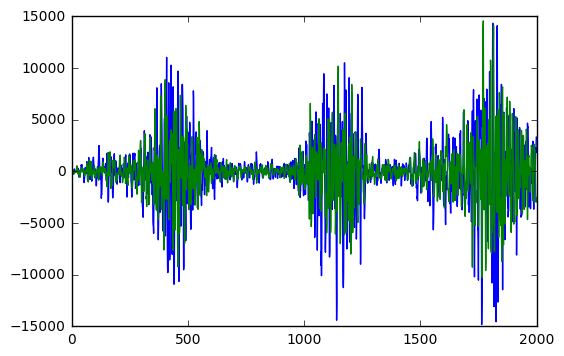

In [8]:
plt.plot(factorizer.transfer_approximated[:,hidden_column_idxs])

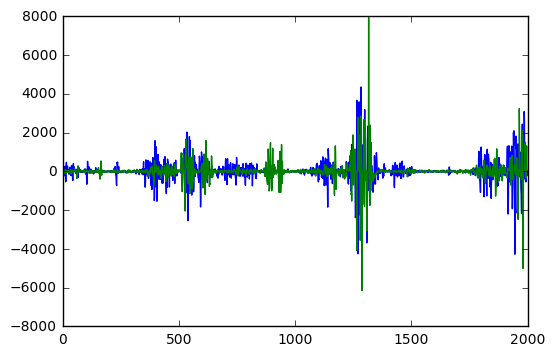

In [9]:
plt.plot(W[:, hidden_column_idxs])

In [10]:
np.log10(np.sum(((factorizer.transfer_approximated - W)[:, hidden_column_idxs]) ** 2))

10.477326044949049

In [11]:
factorizer.base.shape

(100, 3, 4)

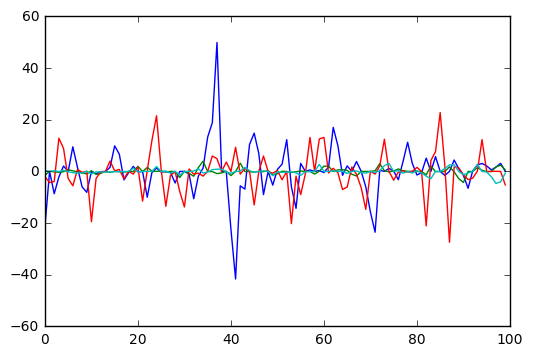

In [12]:
plt.plot(factorizer.base.transpose(1,0,2)[0,:,:])